In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import time as time
from scipy.optimize import curve_fit

# Etalon Lock on

In [3]:
filename = '19.10.2022, 15.53,  434.92596121 THz.xlsx'
sheetname = '19.10.2022, 15.53,  434.9259612'
row_start = 41
row_end = 25245

df = pd.read_excel(filename,sheet_name=sheetname,header=int(row_start)-2,nrows=int(row_end)-int(row_start)+1)
df.columns = ['time / ms','wavelength / nm','a','b','c'] # rename ([] and _ cannot be processed by LaTeX weird.. space is ok)

df.iloc[:,0] = df.iloc[:,0]/1000 #convert ms to s

df.columns = ['time / s','wavelength / nm','a','b','c']

# df.plot("time / s",
#         "wavelength / nm",
#         kind='scatter',
#         s=1,
#         figsize=(9,6),
#         xlabel='Time / s',
#         ylabel='Wavelength / nm',
#         title='221019 Long term wavelength drift with etalon lock')
# ax = plt.gca()
# ax.get_yaxis().get_major_formatter().set_useOffset(False)
# plt.annotate('Drift = 0.015MHz/s',xy=(0,689.29540))
# plt.show()
# plt.savefig('221019 Long term wavelength drift with etalon lock'+'.png',bbox_inches='tight',dpi=300)

Gradient (frequency): 16.787077165970448 ± 0.030715787284136965 kHz/s


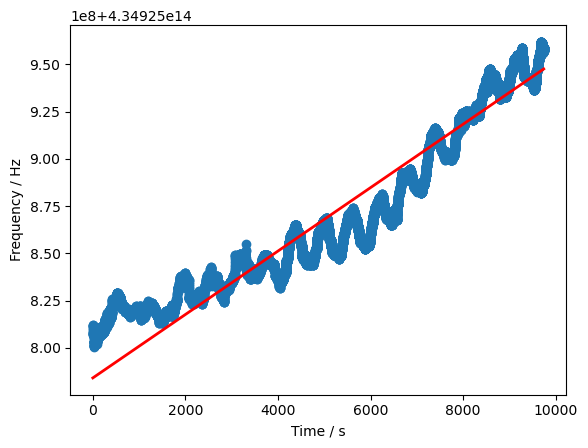

In [4]:
xdata = df['time / s'].values
ydata = df['wavelength / nm'].values
speed_of_light = 299792458  # m/s
ydata_wavelength = ydata * 1e-9  # Convert nm to m
ydata_frequency = speed_of_light / (ydata_wavelength) # Convert wavelength to frequency in Hz

plt.plot(xdata, ydata_frequency, 'o', label='Data')

# Define linear function
def linear(x, m, c):
    return m * x + c

popt, pcov = curve_fit(linear, xdata, ydata_frequency,p0=[1, 434.92596121e12])
gradient_freq, intercept_freq = popt
gradient_uncertainty_freq = np.sqrt(pcov[0, 0])
fit_y_freq = linear(xdata, gradient_freq, intercept_freq)
plt.plot(xdata, fit_y_freq, color='red', linewidth=2, label='Linear fit')
plt.xlabel('Time / s')
plt.ylabel('Frequency / Hz')
print(f"Gradient (frequency): {gradient_freq/1e3} ± {gradient_uncertainty_freq/1e3} kHz/s")

# Etalon lock off

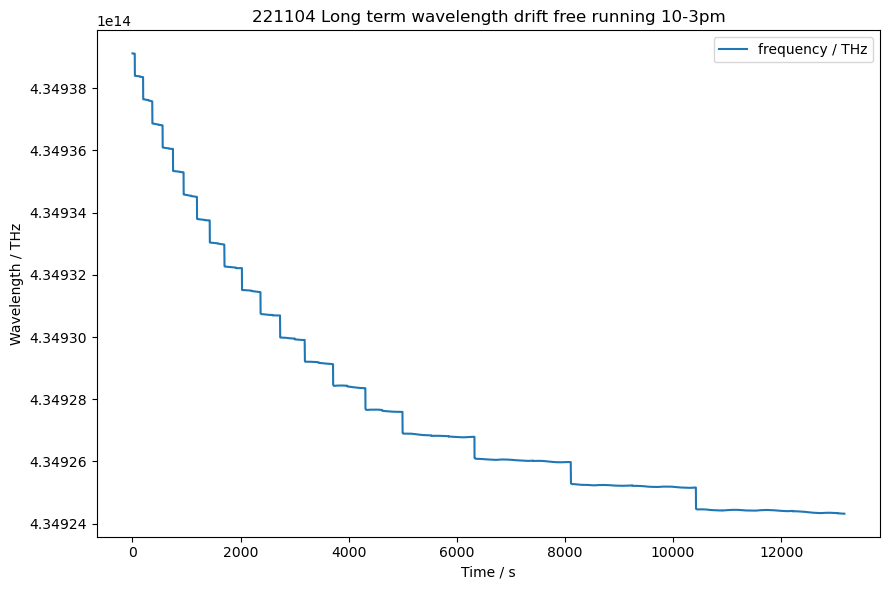

In [5]:
filename = '04.11.2022, 15.09,  434.92431921 THz.xlsx'
sheetname = '04.11.2022, 15.09,  434.9243192'
row_start = 71
row_end = 44511

df = pd.read_excel(filename,sheet_name=sheetname,header=int(row_start)-2,nrows=int(row_end)-int(row_start)+1)

## Change column name for df.plot

df.columns = ['time / ms','wavelength / nm','frequency / THz','b','c'] # rename ([] and _ cannot be processed by LaTeX weird.. space is ok)

## Convert ms to s

df.iloc[:,0] = df.iloc[:,0]/1000 #convert ms to s

## Convert freq from Hz to THz

df.iloc[:,2] = df.iloc[:,2] #convert Hz to THz

## Rename again 

df.columns = ['time / s','wavelength / nm','frequency / THz','b','c']

# Plot out

df.plot("time / s",
        "frequency / THz",
        figsize=(9,6),
        xlabel='Time / s',
        ylabel='Wavelength / THz',
        title='221104 Long term wavelength drift free running 10-3pm')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_useOffset(False)
plt.tight_layout()
# plt.annotate('Drift = 0.04MHz/s',xy=(22000,434.92570))
# plt.annotate(' ',xy=(1000,434.9258), xytext=(10000,434.9251), arrowprops=dict(arrowstyle='<->'))
# plt.annotate('PI off',xy=(5000,434.9255))
# plt.annotate(' ',xy=(22500,434.9258), xytext=(25000,434.9257), arrowprops=dict(arrowstyle='<->'))
# plt.annotate('PI on',xy=(23000,434.9258))

plt.show()
# plt.savefig('221019 Long term wavelength drift with etalon lock'+'.png',bbox_inches='tight',dpi=300)

Gradient (frequency): -974.9348722864415 ± 1.883419650902345 kHz/s


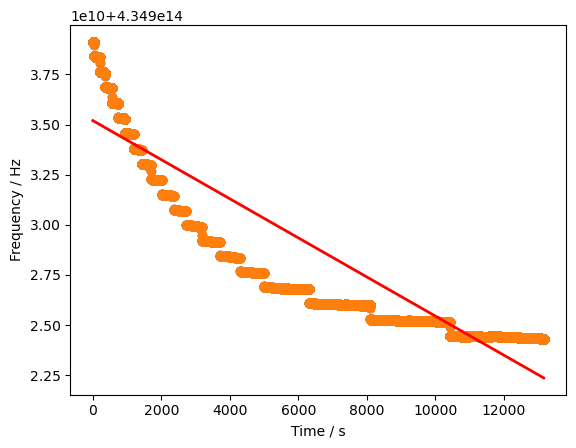

In [6]:
xdata_etalonoff = df['time / s'].values
ydata_etalonoff = df['frequency / THz'].values
plt.plot(xdata_etalonoff, ydata_etalonoff, 'o', label='Data')

speed_of_light = 299792458  # m/s

plt.plot(xdata_etalonoff, ydata_etalonoff, 'o', label='Data')

# Define linear function
def linear(x, m, c):
    return m * x + c

popt, pcov = curve_fit(linear, xdata_etalonoff, ydata_etalonoff,p0=[1, 434.92596121e12])
gradient_freq, intercept_freq = popt
gradient_uncertainty_freq = np.sqrt(pcov[0, 0])
fit_y_freq = linear(xdata_etalonoff, gradient_freq, intercept_freq)
plt.plot(xdata_etalonoff, fit_y_freq, color='red', linewidth=2, label='Linear fit')
plt.xlabel('Time / s')
plt.ylabel('Frequency / Hz')
print(f"Gradient (frequency): {gradient_freq/1e3} ± {gradient_uncertainty_freq/1e3} kHz/s")

In [14]:
# copy paste this code to the beginning of your script to set the plotting style for a two column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    # "figure.constrained_layout.use": True
})

plt.rcParams["figure.autolayout"] = False # set to True if you want to use constrained_layout

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
# plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markersize"] = 6 #data point size
# plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
# plt.rcParams["lines.markerfacecolor"] = "dodgerblue" # color of the inside of the marker
# plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
# plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7





# plot two figures side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it, this is manual very of use constrained_layout

# That warning is because matplotlib’s default layout engine has changed in recent
# versions to use constrained_layout, which is incompatible with subplots_adjust and tight_layout. 
# If you try to use plt.subplots_adjust when constrained_layout=True, matplotlib will raise that warning and ignore the call.
# If you're manually adjusting spacing, disable constrained_layout when you create the figure:

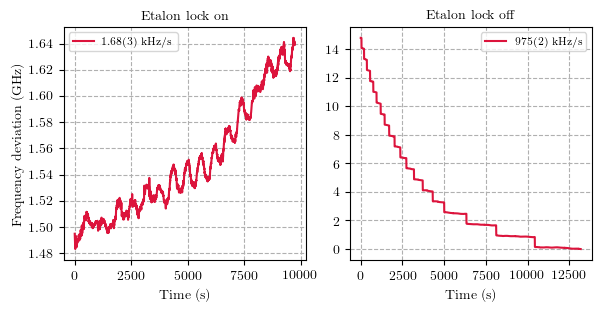

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2,constrained_layout=True)

ax1.plot(xdata, (ydata_frequency-ydata_etalonoff[-1])/1e9, '-', linewidth=1.5, label='1.68(3) kHz/s', color='crimson', )
ax2.plot(xdata_etalonoff, (ydata_etalonoff-ydata_etalonoff[-1])/1e9,'-', linewidth=1.5, label='975(2) kHz/s', color='crimson')
ax1.set_title('Etalon lock on')
ax2.set_title('Etalon lock off')
ax1.set_xlabel('Time (s)')
ax2.set_xlabel('Time (s)')
ax1.set_ylabel('Frequency deviation (GHz)')
ax1.set_xticks([0,2500,5000,7500,10000])
ax2.set_xticks([0,2500,5000,7500,10000,12500])
ax1.set_yticks(np.arange(1.48,1.66,0.02))
ax2.set_yticks(np.arange(0,16,2))
ax1.legend()
ax2.legend(loc='upper right')
plt.savefig("250517 WavelengthDriftTwoColumnPlots.pdf",dpi=300)

In [9]:
ydata_etalonoff[-1]

434924317439229.0